<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/library_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7: Comparison Between Libraries
| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| MUHAMMAD IQMAL BIN SIS | A21EC0080 | Dask |
| ALYA BALQISS BINTI AZAHAR | A21EC0158 | Pandas |
| NADIA SYAFIQAH BINTI ZULKIPLI | A21EC0098 | Modin |
| MUHAMMAD HARITH HAKIM BIN OTHMAN | A21EC0205 | Comparison & Summarization |

## **1. Data Selection**
The dataset encompasses property sales records starting from January 1995 up to the most recent monthly data available. It includes diverse transaction types, spanning from residential to commercial properties, offering a comprehensive perspective on the real estate market in England and Wales.

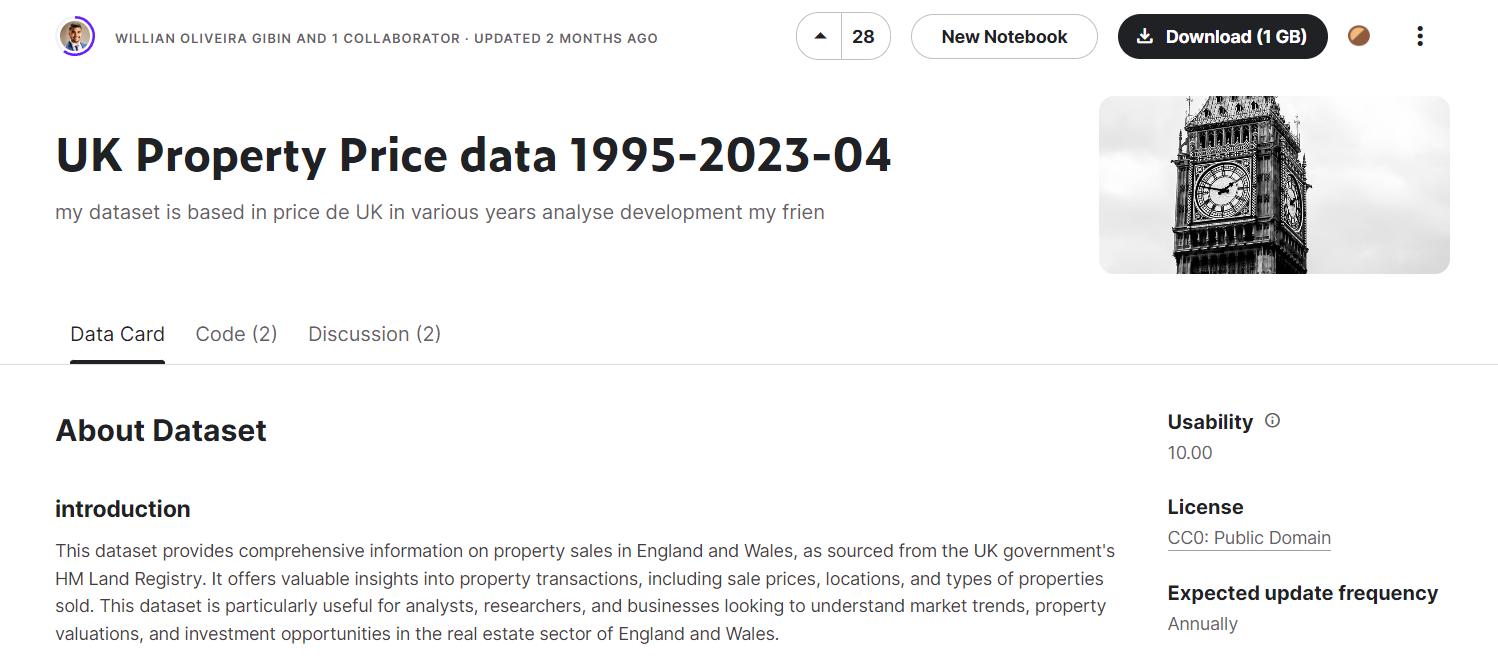

## 2. Load Dataset

1. Import Libraries

In [ ]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadiqmal","key":"47d479b8e198bb882404db95dfb89eba"}'}

2. Upload Dataset using Kaggle API

In [ ]:
!pip install kaggle # 1. Install the Kaggle Package
!mkdir -p ~/.kaggle # 2. Create a Kaggle Directory
!cp kaggle.json ~/.kaggle/ #3. Upload the Kaggle API Token
!chmod 600 ~/.kaggle/kaggle.json #4. Set File Permission

3. Install Measurement Extension

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00
time: 238 µs (started: 2023-12-26 04:48:37 +00:00)


4. Download Dataset

In [ ]:
!kaggle datasets download willianoliveiragibin/uk-property-price-data-1995-2023-04

100% 1.35G/1.36G [00:14<00:00, 58.3MB/s]
100% 1.36G/1.36G [00:14<00:00, 98.1MB/s]
time: 15.8 s (started: 2023-12-26 04:48:37 +00:00)


5. Unzip the Dataset

In [ ]:
!unzip uk-property-price-data-1995-2023-04.zip

Archive:  uk-property-price-data-1995-2023-04.zip
  inflating: 202304.csv              
time: 49.7 s (started: 2023-12-26 04:48:53 +00:00)


## 3. Big Data Operations
Big data operations encompass the management and analysis of extensive data sets to derive valuable insights. In this specific case, the focus was on executing essential data preprocessing tasks.

These included data sampling to extract representative subsets, optimizing data types to enhance storage and processing efficiency, eliminating missing values to maintain data integrity, removing duplicates for increased accuracy, and selectively dropping columns to streamline the dataset.

These crucial actions are fundamental in preparing large datasets for analysis, facilitating the extraction of meaningful conclusions and supporting informed decision-making processes.

### 3.1 Data Sampling
The initial step involves data sampling because of the dataset's extensive size, totaling 4GB of data and 28.3 million rows. Attempting to read the dataset in its entirety leads to a Google Colab session crash. Therefore, it was determined to sample 10% of the data for analysis.

1. Import necessary Libraries

In [ ]:
import dask.dataframe as dd
import os
import time
import random
import psutil
import sys  # For object size
from dask.diagnostics import ProgressBar, ResourceProfiler

time: 829 ms (started: 2023-12-26 04:49:43 +00:00)


2. Perform Data Sampling

In [ ]:
memory_before = psutil.Process().memory_info().rss / 1024 / 1024

filename = "202304.csv"

dtype={'31': 'object','Unnamed: 8': 'object'}

# Record the start time
start_time = time.time()

# Create a Dask DataFrame from a CSV file
df = dd.read_csv(filename,dtype=dtype)

# Perform data sampling
df = df.sample(frac=0.1, random_state=42)

memory_after = psutil.Process().memory_info().rss / 1024 / 1024
computation_time = time.time() - start_time  # Computation time in seconds
final_file_size = os.path.getsize(filename) / (1024 ** 2)  # File size in MB


time: 19.6 ms (started: 2023-12-26 04:54:06 +00:00)


2.2 Calculation

In [ ]:
memory_used = memory_after - memory_before
final_file_size = os.path.getsize(filename) / (1024 ** 2)  # File size in MB


2.3 Print Result

In [ ]:
print(f"File Size after Sampling: {final_file_size:.2f} MB")
print(f"Computation Time: {computation_time:.2f} seconds")
print(f"Memory Usage after Sampling: {memory_used:.2f} MB")

File Size after Sampling: 4714.51 MB
Computation Time: 0.03 seconds
Memory Usage after Sampling: 2.36 MB


3. Display 5 row of the data

In [ ]:
df.head(5)

[########################################] | 100% Completed | 2.90 s


,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,Unnamed: 8,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES.1,MILTON KEYNES.2,A,A.1
280372,{8C742CE3-AB33-4D0A-893C-6399CF2E5A4D},57500,1995-09-29 00:00,BN2 9XF,T,N,F,14,NaN,WHICHELO PLACE,BRIGHTON,BRIGHTON,BRIGHTON,EAST SUSSEX,A,A
195539,{5251FF62-B0EB-43C9-9412-8E2AD7A550AD},62500,1995-11-29 00:00,GL15 5LQ,S,N,F,25,NaN,SPRINGFIELD ROAD,LYDNEY,LYDNEY,FOREST OF DEAN,GLOUCESTERSHIRE,A,A
124535,{B557D93A-2A83-4DE8-9BE2-BDE965F4F01B},268000,1995-04-26 00:00,GU9 8DG,D,N,F,26,NaN,BROOMLEAF ROAD,FARNHAM,FARNHAM,WAVERLEY,SURREY,A,A
195784,{1811A220-D507-44AD-9784-782148763BDD},68000,1995-08-25 00:00,SS6 8JP,D,N,F,15,NaN,HIGHFIELD CRESCENT,RAYLEIGH,RAYLEIGH,ROCHFORD,ESSEX,A,A
33688,{C9F12563-B7CE-42E2-9195-8887B9C9EB9D},31500,1995-01-13 00:00,TN37 6JE,T,N,F,19,NaN,TOWER ROAD,ST. LEONARDS-ON-SEA,ST. LEONARDS-ON-SEA,HASTINGS,EAST SUSSEX,A,A


time: 2.94 s (started: 2023-12-25 06:12:00 +00:00)


4. Add columns names for header

In [ ]:
# Define your column names for header
column_names = ['Transaction Unique Identifier',
                'Price', 'Transfer Date', 'Postcode', 'Property Type', 'Old/New',
                'Duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City', 'District',
                'County', 'PPDCategory Type', 'Record Status - Monthly File Only']

# Assign column names to the dataframe
df.columns = column_names

time: 2.74 ms (started: 2023-12-26 04:54:09 +00:00)


4.1 Display the updated dataframe

In [ ]:
df.head()

[########################################] | 100% Completed | 1.84 s


,Transaction Unique Identifier,Price,Transfer Date,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory Type,Record Status - Monthly File Only
280372,{8C742CE3-AB33-4D0A-893C-6399CF2E5A4D},57500,1995-09-29 00:00,BN2 9XF,T,N,F,14,NaN,WHICHELO PLACE,BRIGHTON,BRIGHTON,BRIGHTON,EAST SUSSEX,A,A
195539,{5251FF62-B0EB-43C9-9412-8E2AD7A550AD},62500,1995-11-29 00:00,GL15 5LQ,S,N,F,25,NaN,SPRINGFIELD ROAD,LYDNEY,LYDNEY,FOREST OF DEAN,GLOUCESTERSHIRE,A,A
124535,{B557D93A-2A83-4DE8-9BE2-BDE965F4F01B},268000,1995-04-26 00:00,GU9 8DG,D,N,F,26,NaN,BROOMLEAF ROAD,FARNHAM,FARNHAM,WAVERLEY,SURREY,A,A
195784,{1811A220-D507-44AD-9784-782148763BDD},68000,1995-08-25 00:00,SS6 8JP,D,N,F,15,NaN,HIGHFIELD CRESCENT,RAYLEIGH,RAYLEIGH,ROCHFORD,ESSEX,A,A
33688,{C9F12563-B7CE-42E2-9195-8887B9C9EB9D},31500,1995-01-13 00:00,TN37 6JE,T,N,F,19,NaN,TOWER ROAD,ST. LEONARDS-ON-SEA,ST. LEONARDS-ON-SEA,HASTINGS,EAST SUSSEX,A,A


time: 1.86 s (started: 2023-12-25 06:13:07 +00:00)


### 3.2 Optimizing Data Types
Optimizing data types is a crucial step in data management aimed at enhancing the efficiency of data storage and processing. This process involves strategically selecting the most suitable data formats to represent information accurately while minimizing memory usage

1. Change the datatype to a suitable format

In [ ]:
# Measure the start time
start_time = time.time()

filename = "202304.csv"

# Define the data types for each column based on optimization
data_types = {
    'Transaction Unique Identifier': 'string',
    'Price': 'float32',
    'Transfer Date': 'datetime64',
    'Postcode': 'string',
    'Property Type': 'category',
    'Old/New': 'category',
    'Duration': 'category',
    'PAON': 'string',
    'SAON': 'string',
    'Street': 'string',
    'Locality': 'string',
    'Town/City': 'string',
    'District': 'string',
    'County': 'string',
    'PPDCategory Type': 'category',
    'Record Status - Monthly File Only': 'category'
}

# Convert columns to optimized data types
df = df.astype(data_types)

# Display information after sampling
final_file_size = os.path.getsize(filename) / (1024 ** 2)  # Final file size in MB
computation_time = time.time() - start_time  # Computation time in seconds

# Memory usage
memory_usage = psutil.Process(os.getpid()).memory_info().rss / (1024 ** 2)  # Memory usage in MB

# Display DataFrame(df) object size
df_size = sys.getsizeof(df) / (1024 ** 2)  # Convert to megabytes


time: 12.9 ms (started: 2023-12-26 04:54:12 +00:00)


Calculation of size, memory usage and dataframe size

In [ ]:
# Display information after sampling
final_file_size = os.path.getsize(filename) / (1024 ** 2)  # Final file size in MB

# Memory usage
memory_usage = psutil.Process(os.getpid()).memory_info().rss / (1024 ** 2)  # Memory usage in MB

# Display DataFrame(df) object size
df_size = sys.getsizeof(df) / (1024 ** 2)  # Convert to megabytes

time: 2.3 ms (started: 2023-12-25 06:16:22 +00:00)


Print Result

In [ ]:
# Print results
print(f"File Size: {final_file_size:.2f} MB")
print(f"Computation Time: {computation_time:.2f} seconds")
print(f"Memory Usage: {memory_usage:.2f} MB")
print(f"DataFrame Size: {df_size:.2f} MB")

File Size: 4714.51 MB
Computation Time: 0.03 seconds
Memory Usage: 1894.11 MB
DataFrame Size: 0.00 MB
time: 3.55 ms (started: 2023-12-25 06:16:24 +00:00)


Dataframe Info

In [ ]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 16 entries, Transaction Unique Identifier to Record Status - Monthly File Only
dtypes: category(5), datetime64[ns](1), float32(1), string(9)time: 6.26 ms (started: 2023-12-25 06:16:42 +00:00)


### 3.3 Drop Missing Values and Duplicate Values
Dropping missing values is an essential procedure in data preprocessing that involves eliminating instances within a dataset where information or values are absent or incomplete. This process ensures the integrity and reliability of the dataset for subsequent analysis or modeling.

Dropping duplicate values is a step in data cleaning and preparation, focusing on the identification and removal of identical records or entries within a dataset. This process aims to streamline data quality by eliminating redundant information, ensuring data accuracy, and maintaining the integrity of analyses or models.

In [ ]:
# Record the start time
start_time = time.time()

# Drop missing values
df = df.dropna()

# Drop duplicates
df = df.drop_duplicates()

# Record the end time
end_time = time.time()


time: 24.2 ms (started: 2023-12-26 04:54:16 +00:00)


Calculation computation, file size and memory usage

In [ ]:
# Calculate computation time
computation_time = end_time - start_time

# Get the file size of the DataFrame after dropping duplicates
file_size = os.path.getsize(filename) / (1024 ** 2)  # Convert to megabytes
# Extract the actual numeric value from Dask Scalar
memory_usage_value = memory_usage.compute()

[########################################] | 100% Completed | 184.57 s
time: 3min 4s (started: 2023-12-25 09:11:17 +00:00)


Print result

In [ ]:
# Print results
print("Memory usage after: {:.2f} MB".format(float(memory_usage_value)))
print("File size after dropping duplicates: {:.2f} MB".format(file_size))
print("Computation time: {:.2f} seconds".format(computation_time))

Memory usage after: 14.36 MB
File size after dropping duplicates: 4714.51 MB
Computation time: 0.04 seconds
time: 1.13 ms (started: 2023-12-25 09:19:45 +00:00)


### 3.4 Drop Columns

Dropping columns refers to the deliberate removal of specific attributes or variables from a dataset during data preprocessing. This process is aimed at refining the dataset by excluding columns that may not contribute significantly to the analysis, contain redundant or irrelevant information, or pose challenges.

In this scenario, the columns labeled 'SAON', 'Duration', 'PPDCategory Type', and 'Record Status - Monthly File Only' were removed due to the absence of explanatory information on the Kaggle website. Owing to the lack of provided details, interpreting these columns became challenging, prompting their exclusion from the dataset.

In [ ]:
# Record the start time
start_time = time.time()

# List of columns to drop
columns_drop = ['SAON', 'Duration', 'PPDCategory Type', 'Record Status - Monthly File Only']

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_drop)

# Record the end time
end_time = time.time()

# Calculate computation time
computation_time = end_time - start_time

# Get the file size of the DataFrame after dropping specified columns
file_size = os.path.getsize(filename) / (1024 ** 2)  # Convert to megabytes

# Get the memory usage of the DataFrame after dropping specified columns
memory_usage_value = df.memory_usage(deep=True).sum().compute()

time: 1min 28s (started: 2023-12-26 04:54:19 +00:00)


Print Result

In [ ]:
# Print results
print("Memory usage: {:.2f} MB".format(float(memory_usage_value)))
print("File size after dropping specified columns: {:.2f} MB".format(file_size))
print("Computation time: {:.2f} seconds".format(computation_time))


Memory usage: 91289277.00 MB
File size after dropping specified columns: 4714.51 MB
Computation time: 0.01 seconds
time: 779 µs (started: 2023-12-26 04:56:24 +00:00)


## 4. Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a significant approach that involves investigating and summarizing the main characteristics, patterns, and relationships within a dataset. Through visual and statistical methods, EDA aims to comprehend the structure of the data, identify key trends, anomalies, and insights, and generate hypotheses for further analysis. It helps in gaining a deeper understanding of the information contained in the dataset before applying more complex modeling or inferential techniques.

Import necessary Libraries

In [ ]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

1. Statistical Measures for Numeric Values (Price)

In [ ]:
# Statistical measures
sum_result = df['Price'].sum()
mean_result = df['Price'].mean()
median_result = df['Price'].quantile(0.5)  # Median is equivalent to quantile(0.5) in Dask
first_quartile_result = df['Price'].quantile(0.25)
third_quartile_result = df['Price'].quantile(0.75)

# Compute the results (Dask is lazy, so you need to trigger the computation)
sum_value = sum_result.compute()
mean_value = mean_result.compute()
median_value = median_result.compute()
first_quartile_value = first_quartile_result.compute()
third_quartile_value = third_quartile_result.compute()

# Display the results
print("\nStatistical Measures (Price)")
print()
print("Sum: ", sum_value)
print("Mean: ", mean_value)
print("Median: ", median_value)
print("First Quartile (Q1): ", first_quartile_value)
print("Third Quartile (Q3): ", third_quartile_value)
print()


[########################################] | 100% Completed | 167.04 s
[########################################] | 100% Completed | 172.98 s
[########################################] | 100% Completed | 167.06 s
[########################################] | 100% Completed | 167.29 s
[########################################] | 100% Completed | 180.01 s

Statistical Measures (Price)

Sum:  28770916000.0
Mean:  185356.92377866112
Median:  140000.0
First Quartile (Q1):  85000.0
Third Quartile (Q3):  220000.0

time: 14min 14s (started: 2023-12-25 09:28:03 +00:00)



> In this dataset, statistical analysis is conducted solely on numerical values, where the "Price" column stands as the only numerical variable. As a consequence, the scope for extracting and analyzing numerical data is notably restricted due to the categorical nature of the other columns in the dataset.

> The tools used are dask, where we highlighted the '.compute' code to make sure the dask library running to compute all the necessary mathematical operation.

> The sum, mean, median, minimum, maximum, first quartile, and third quartile value are calculated.


2. Data Visualisation


> **Pie Chart of Distribution Types:**


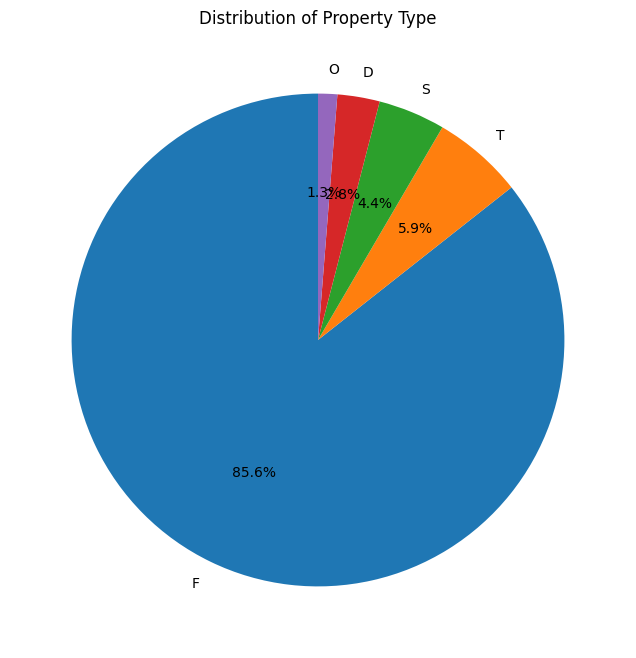

In [ ]:
# Assuming 'Property Type' is a column in your DataFrame
property_type_distribution = df['Property Type'].value_counts().compute()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
property_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Property Type')
plt.ylabel('')  # To remove the default ylabel
plt.show()


The property type abbreviations typically stand for the following categories in real estate:

- F: Flat
- O: Other
- D: Detached (Refers to a standalone house)
- T: Terraced (Refers to a house that shares both side walls with other properties in a row)
- S: Semi-detached (Refers to a house that shares one side wall with another property)

The data indicates that 'F' property type, representing flats, dominates the property market in the UK, comprising a substantial percentage of 85.7%. Conversely, the 'O' category, encompassing various unspecified property types, represents a minimal proportion at 1.2%.

> **Comparison of New and Old Property Types:**



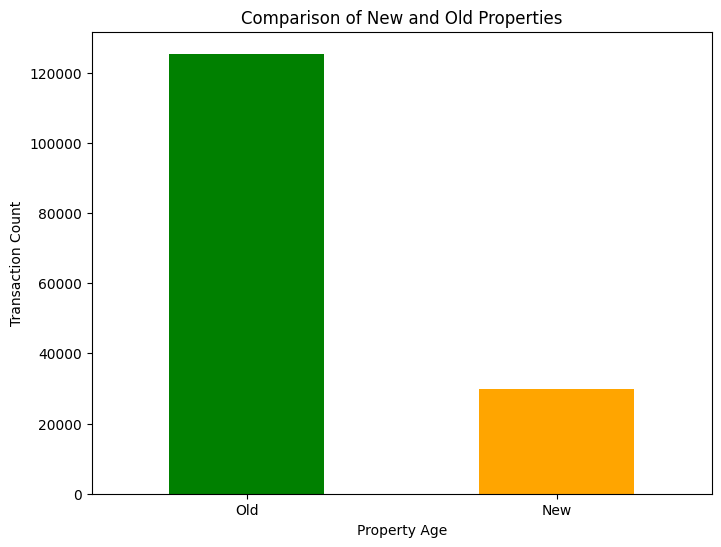

In [ ]:
# Assuming 'Old/New' is a column in your DataFrame
df['Old/New'] = df['Old/New'].replace({'N': 'Old', 'Y': 'New'})

# Compute the value counts of the updated 'Old/New' column
property_age_distribution = df['Old/New'].value_counts().compute()

# Plotting a bar graph
plt.figure(figsize=(8, 6))
property_age_distribution.plot(kind='bar', color=['green', 'orange'])
plt.title('Comparison of New and Old Properties')
plt.xlabel('Property Age')
plt.ylabel('Transaction Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

The data illustrates a significant disparity in counts between Old and New properties, with Old properties numbering over 12,000 while New properties amount to approximately 3,000.

> **Transaction Count in Top 5 Localities:**

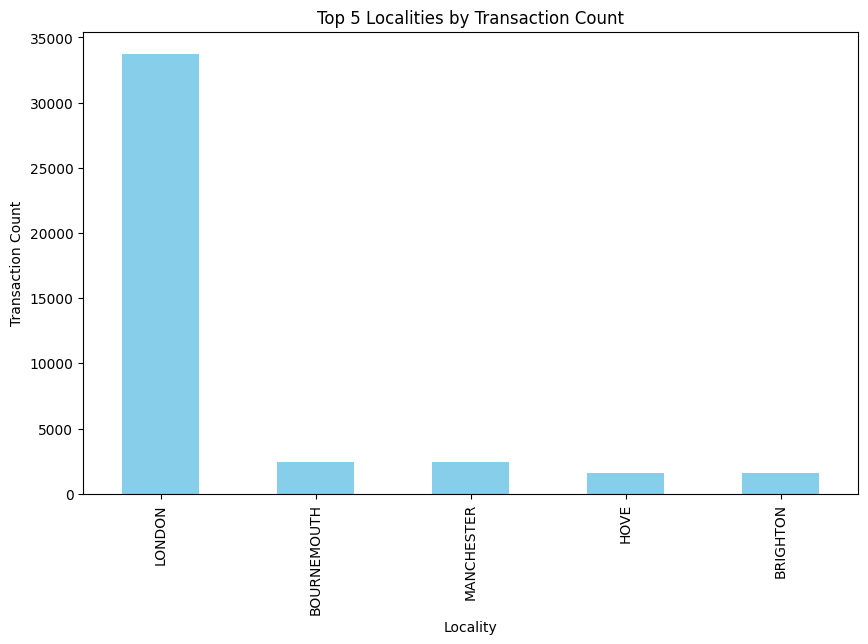

In [ ]:
# Assuming 'Locality' is a column in your DataFrame
top_localities = df['Locality'].value_counts().nlargest(5).compute()

# Plotting a bar graph
plt.figure(figsize=(10, 6))
top_localities.plot(kind='bar', color='skyblue')
plt.title('Top 5 Localities by Transaction Count')
plt.xlabel('Locality')
plt.ylabel('Transaction Count')
plt.show()

The visualization indicates that among the top 5 countries with the highest transaction counts—London, Bournemouth, Manchester, Brighton and Hove. London stands out prominently, registering approximately 34,000 transactions, significantly surpassing the others, each of which has transaction counts below 5,000.

## Question About Dataset

Importing necessary library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

1.  What is the trend or direction in the annual number of transactions over the given period in the dataset?

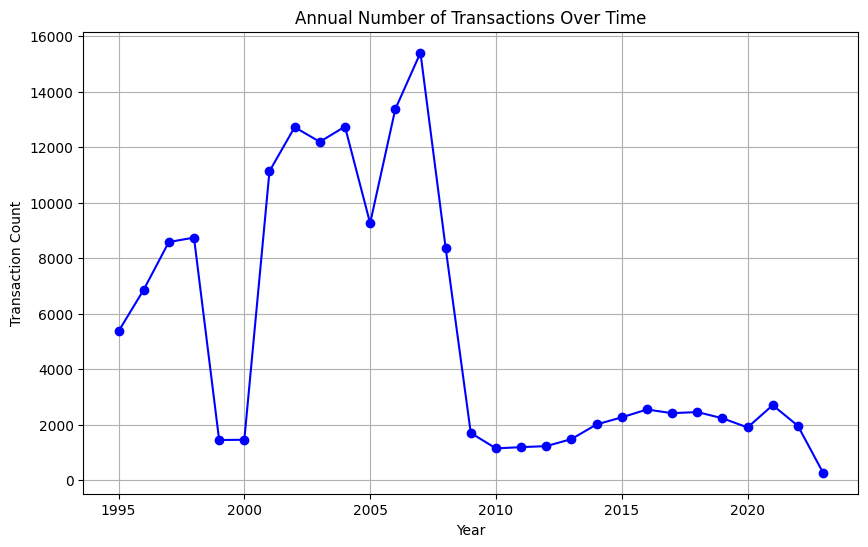

In [ ]:
# Assuming 'Transfer Date' is a column in your DataFrame
df['Transfer Date'] = dd.to_datetime(df['Transfer Date'])

# Extract the year from the 'Transfer Date' column
df['Year'] = df['Transfer Date'].dt.year

# Compute the annual number of transactions
annual_transaction_count = df['Year'].value_counts().compute().sort_index()

# Plotting a line graph to visualize the trend
plt.figure(figsize=(10, 6))
annual_transaction_count.plot(kind='line', marker='o', color='blue')
plt.title('Annual Number of Transactions Over Time')
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()

> **Answer:**
>>  The trend shows that the highest transaction records at 2005 - 2010 where the number of transactions are above 14,000. But, we can see that it plummeted aggresively from late 2005-2010 (possibly 2009) and reach the lowest point for 2005-2010 period which are lower than 2,000 transactions.

>>   The graph also shows that from year 2000, the number of transaction slowly building up until it reaches the highest point of transaction during mid 2005-2010 period.

>> The lowest transaction records are after year 2020, where it almost hit 0 in number of transactions. This might be due to the pandemic that has hit globally where it affect the economic as a whole.

2. What insights can be inferred about the variation in the ratio of new to old properties within the top 10 districts, considering the distribution of new and old properties in these specific areas?

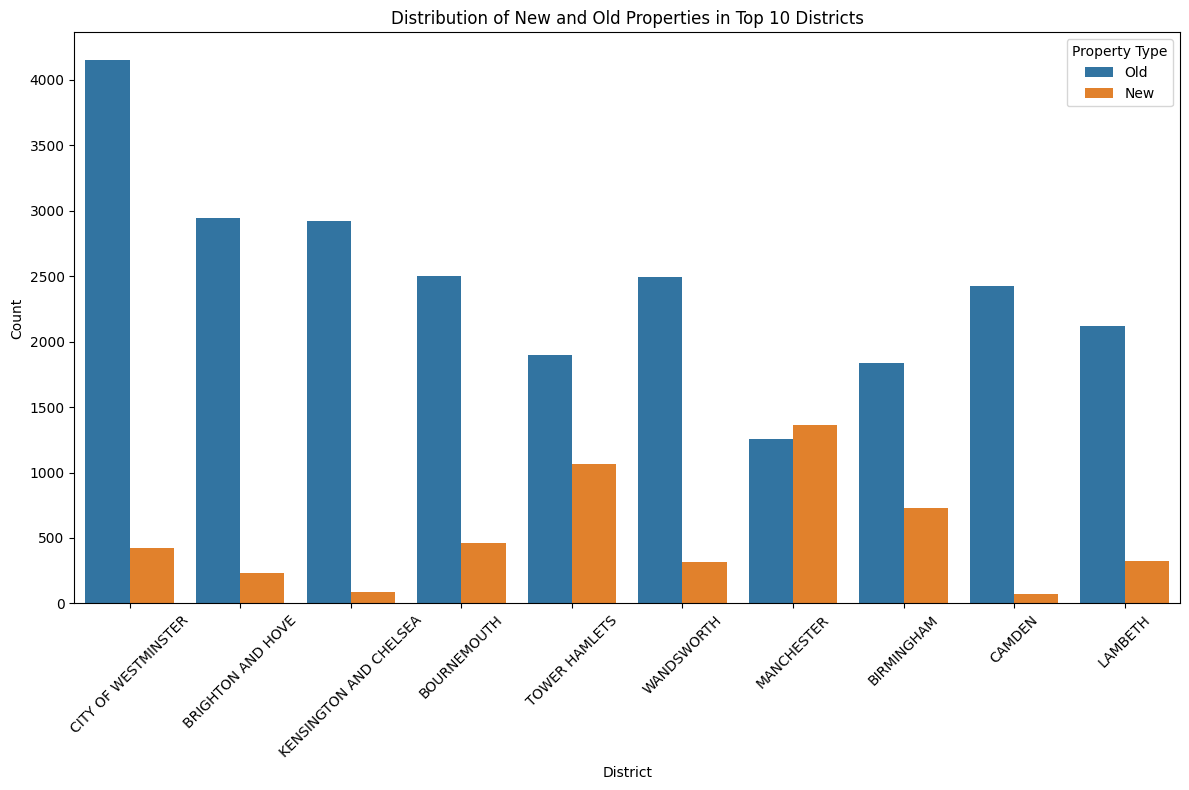

In [ ]:
# Assuming 'Old/New' and 'District' are columns in your DataFrame
df['Old/New'] = df['Old/New'].replace({'N': 'Old', 'Y': 'New'})

# Get the top 10 districts based on the count of properties
top_10_districts = df['District'].value_counts().head(10).index

# Filter the DataFrame for the top 10 districts
df_top_10 = df[df['District'].isin(top_10_districts)]

# Convert Dask DataFrame to Pandas DataFrame
df_top_10_pd = df_top_10.compute()

# Create the count plot for new and old properties in the top 10 districts using Seaborn
plt.figure(figsize=(12, 8))
sns.countplot(x='District', hue='Old/New', data=df_top_10_pd, order=top_10_districts)
plt.title('Distribution of New and Old Properties in Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Count')

# Modifying the legend labels
plt.legend(title='Property Type', labels=['Old', 'New'])

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.tight_layout()
plt.show()

> **Answer**

>>  Based on all these 10 districts, the graph shows that old property type dominantly held all of the districts.

>> From these graph, it shows that City of WestMinster has the highest ol property type as well as one of the lowest new property type. It concludes that this place is less progressive and not one of the most focal point of development.

>> Manchester district hold the most balance between old and new property types. This shows that the district might have a balanced in terms of development.

3. Considering the dataset's **top 10 countie**s by property count, what patterns emerge in the distribution of property types across these counties?

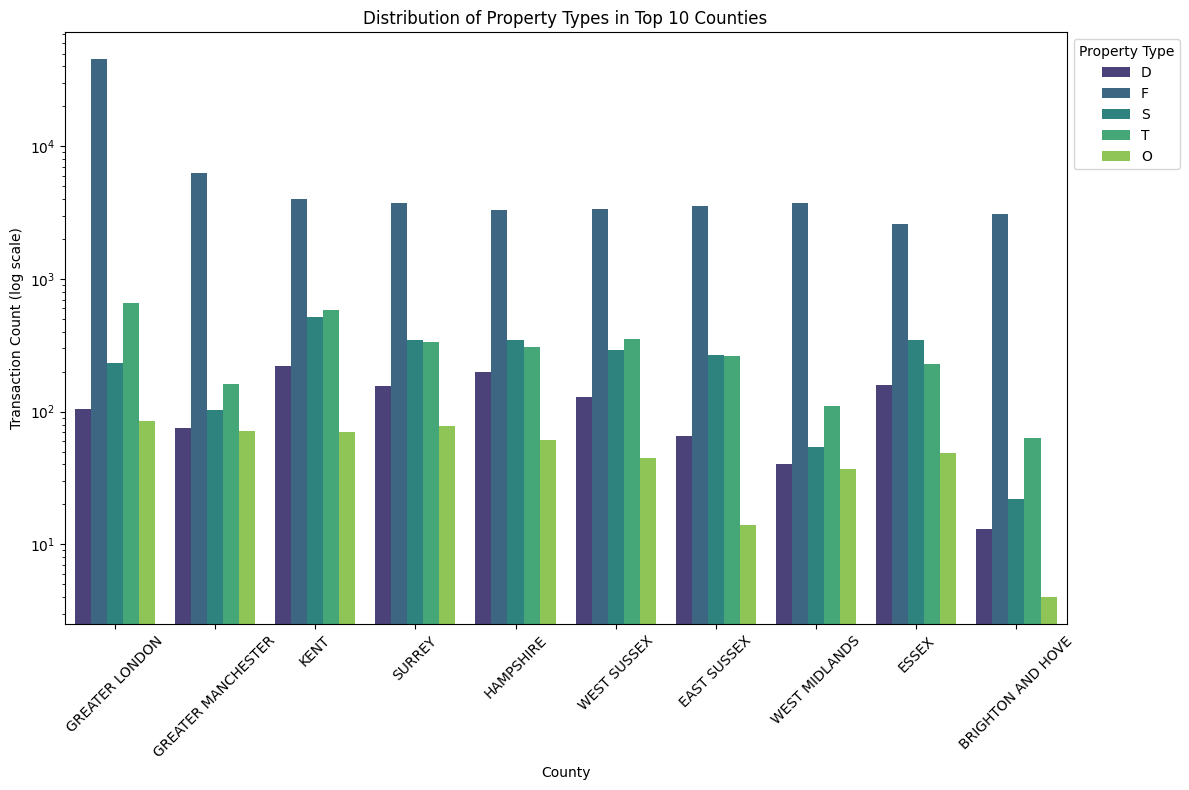

In [ ]:
# Get the top 10 counties based on the count of properties
top_10_counties = df['County'].value_counts().head(10).index

# Filter the DataFrame for the top 10 counties
df_top_10 = df[df['County'].isin(top_10_counties)]

# Convert Dask DataFrame to Pandas DataFrame
df_top_10_pd = df_top_10.compute()

# Create the count plot for property types in the top 10 counties using Seaborn
plt.figure(figsize=(12, 8))
sns.countplot(x='County', hue='Property Type', data=df_top_10_pd, order=top_10_counties, palette='viridis')
plt.title('Distribution of Property Types in Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Transaction Count (log scale)')  # Adjusted ylabel
plt.legend(title='Property Type', bbox_to_anchor=(1, 1), loc='upper left')  # Legend outside the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary

# Set the y-axis to logarithmic scale for better visualization
plt.yscale('log')

plt.tight_layout()
plt.show()

> **Answer:**

>> The high number of Flat (F) properties in Greater London indicates significant urban development, reflecting the district's large population and advanced level of development.

>> Based on all the County, the trend shows that Semi-Detached (S) and Terrace (T) compete with almost the same values.

>> On the contrary, properties categorized as "Other" (O) have the lowest count across all counties. This scarcity can be attributed to the infrequency of distinct or customized property types, likely influenced by the need to accommodate the average income levels across various locations.

> Logarithmic scaling is utilised. In this scenarios, the data have a significant variation or has a few extremely high values (outliers), using a logarithmic scale allows for a clearer representation of the entire data range.





4. In the year 2005, what are the top 5 localities with the highest count of 'S' property types?


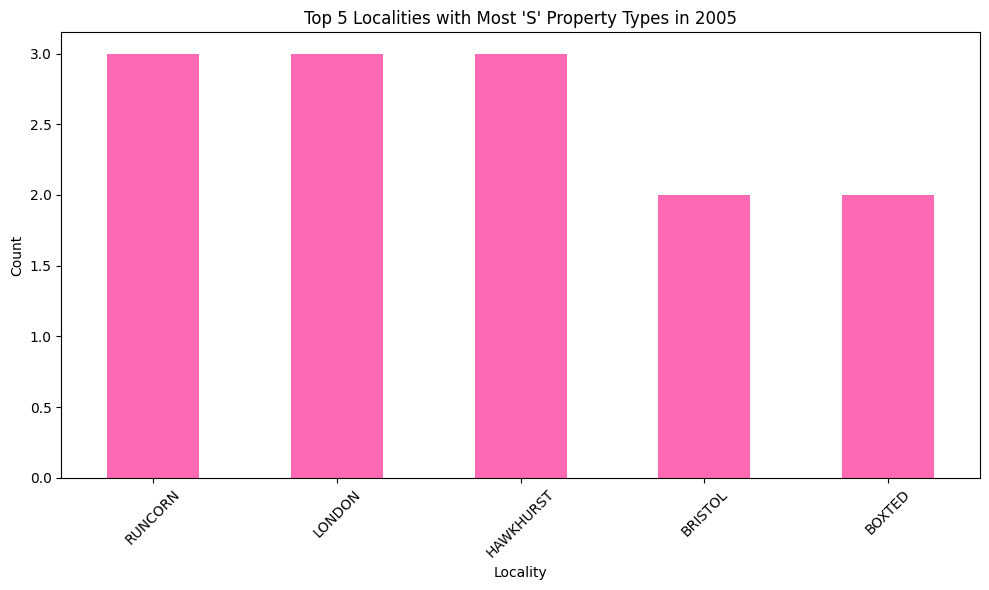

In [ ]:
# Convert 'Transfer Date' to datetime if not already
df['Transfer Date'] = dd.to_datetime(df['Transfer Date'], errors='coerce')

# Filter data for the year 2005 and 'S' property type
data_2005_S = df[(df['Transfer Date'].dt.year == 2005) & (df['Property Type'] == 'S')]

# Compute the top 5 localities with the most 'S' property types
top_5_localities_S = data_2005_S['Locality'].value_counts().nlargest(5)

# Convert Dask Series to Pandas Series for plotting
top_5_localities_S_pd = top_5_localities_S.compute()

# Plotting a bar graph for top 5 localities with most 'S' property types in 2005
plt.figure(figsize=(10, 6))
top_5_localities_S_pd.plot(kind='bar', color='hotpink')
plt.title('Top 5 Localities with Most \'S\' Property Types in 2005')
plt.xlabel('Locality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Answer:**

>> Runcorn, London and HawkHurst has the highest count for Semi-Detached (S) property. This is because these place is a developed place thus, the demand for Semi-Detached house also risen. Thus making the S property increases the most.

>> Bristol and Boxted hold the same value.

>> The mix of property types in different areas reflects the local lifestyle. Urban hubs like London favor flats for a dense population, while the others is less dense compared to the Runcorn, London and Hawkhurst



5. How does the average property price differ across top 10 districts?

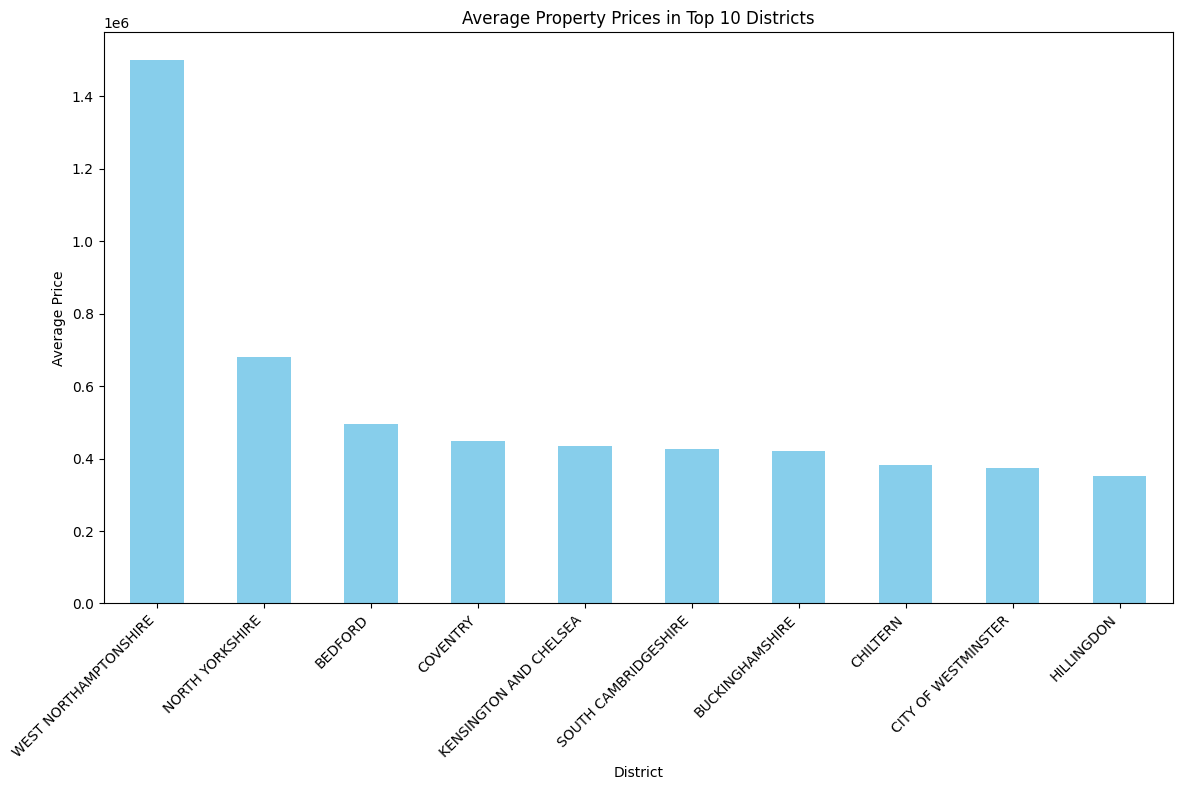

In [ ]:
# Assuming 'Price' and 'District' are columns in your DataFrame
df['Price'] = df['Price'].astype('float32')  # Make sure 'Price' is of numeric type

# Calculate the mean property price for each district
mean_prices = df.groupby('District')['Price'].mean().compute().sort_values(ascending=False).head(10)

# Plotting a bar graph for average property prices across top 10 districts
plt.figure(figsize=(12, 8))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Average Property Prices in Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

> **Answer:**

>> West Northamptonshire District has the highest average price for the property. From this data, it shows that this district is one of the

>> On the other end of the spectrum, Chiltern to Hillingdon hold the lowest number of properties, and their counts are relatively similar. This observation suggests a potential low setting for these areas, contributing to their lower property numbers.